In [ ]:
!pip install control

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letraimport matplotlib.pyplot as plt

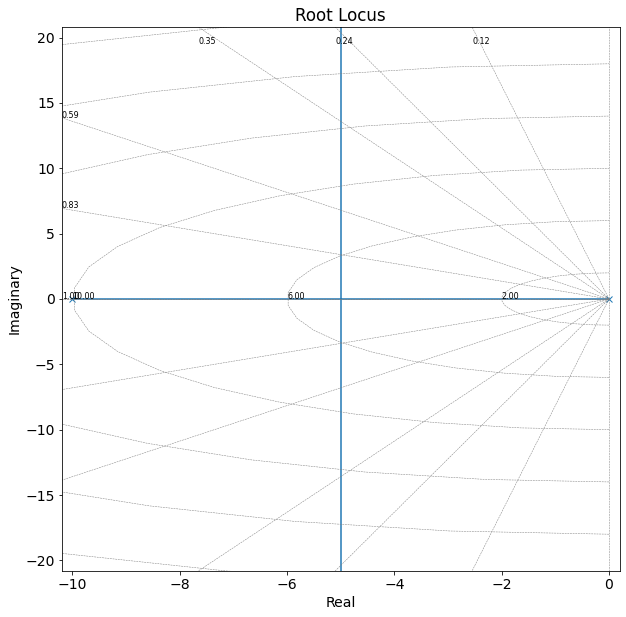

In [ ]:
# Ver mais sobre o comando rlocus em
# https://python-control.readthedocs.io/en/latest/generated/control.matlab.rlocus.html

# rlocus exemplo 1 (slide 5 Aula 7 Semana3)
# argumento da função rlocus H(s) da equação caracteristica 1+CH(s)=0
ex1 = TransferFunction(1, [1,10,0]) # função transferência de H(s)
out = ctl.rlocus(ex1, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, print_gain=None, grid=None)



1.5 s^2 - 6 s + 30
------------------
   2.5 s^2 + 38

_____Eigenvalue______ Damping___ Frequency_
        -0    +3.899j          0      3.899
         0    -3.899j         -0      3.899


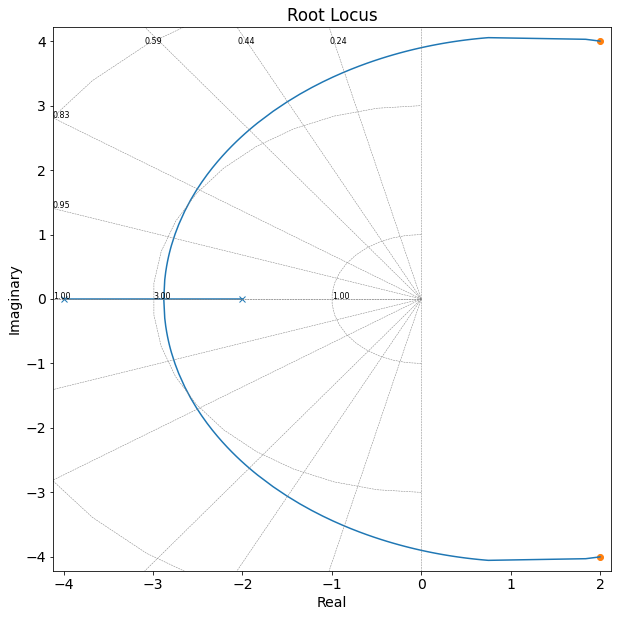

In [ ]:
# rlocus exemplo 2 (slide 8 Aula 7 Semana3)
# argumento da função rlocus H(s) da equação caracteristica 1+KH(s)=0
ex2 = TransferFunction([1,-4,20], [1,6,8])
out2 = ctl.rlocus(ex2, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, print_gain=True, grid=None)

K=1.5
# Malha fechada sys1 = linha de cima e sys2 a linha de baixo da realimentação
malha_fechada = ctl.feedback(sys1 = K*ex2, sys2=1, sign=-1)
print(malha_fechada)

# dados do polos
# comando que extrai os polos, a freq. natural e o amortecimento do sistema
wn, damping, pole = ctl.damp(malha_fechada) # Verificar que o damp é igual a zero


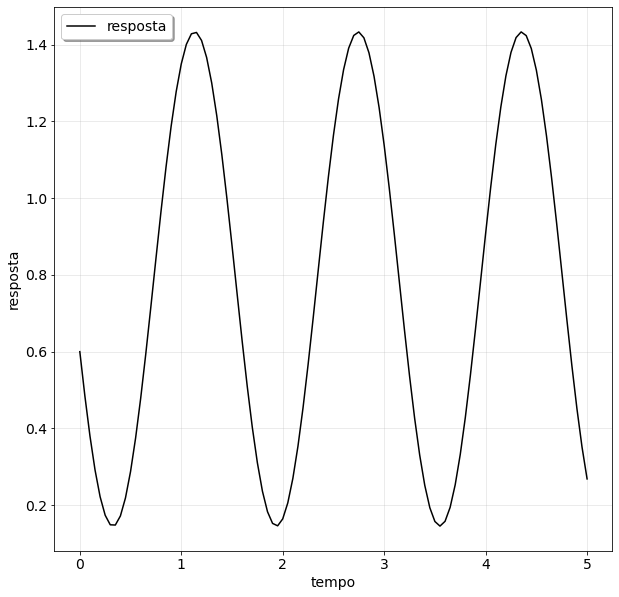

In [ ]:
t = np.linspace(0, 5, 101) # vetor tempo
# Resposta ao degrau do exemplo 2 com granho crítico K = 1.5
tout, yout = ctl.step_response(malha_fechada, t, X0=0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
# sem unidades no eixo pois não temos estas informações
plt.xlabel('tempo')
plt.ylabel('resposta')
plt.show()